# Problem

To predict stock’s day HIGH and LOW prices based on its OPEN and historical daily price.


## Data Description

The data was downloaded from the Yahoo Finance. The underlying stock is Tencent (700.hk). I renamed the column names as the following:

**DATE**: Trading date

**OPEN**:Current day open price

**CLOSE**:Current day last traded price recorded on exchange

**HIGH**:Current day highest trade price

**LOW**:Current day lowest trade price

**VOLUME**:Current day trade volume


## Data File Path

The data file has been uploaded as https://mryinglee.github.io/DailyPrices.csv


In [0]:
DATA_PATH='https://mryinglee.github.io/DailyPrices.csv'

# Academic Review

The time-varying volatility and volatility clustering are often observed in the financial market. High and low price can be treated as an indicator of volatility. There are some papers to research on prediction of high and low price. 

## High and Low Prices Research Review
(Mainly digested from  **High and Low Intraday Commodity
Prices: A Fractional Integration and
Cointegration Approach**
Yaya, OlaOluwa S and Gil-Alana, Luis A.
University of Navarra, Spain, University of Ibadan, Nigeria
, 5 December 2018)


In financial economics, the difference between high and low intraday or daily prices is known
as the range. Volatility can be expected to be higher if the range is wider. Parkinson (1980)
showed that, in fact, the price range is a more efficient volatility estimator than alternatives
such as the return-based estimator. It is also frequently used in technical analysis by traders in
financial markets (see, e.g., Taylor and Allen, 1992). However, as pointed out by Cheung et al.
(2009), focusing on the range itself might be useful if one’s only purpose is to obtain an
efficient proxy for the underlying volatility, but it also means discarding useful information
about price behaviour that can be found in its components. Therefore, in their study, Cheung
et al. (2009) analyse simultaneously both the range and daily highs and lows using daily data
for various stock market indices. Because of the observation that the latter two variables
generally do not diverge significantly over time, having found that they both exhibit unit roots
by carrying out Augmented Dickey-Fuller (ADF) tests (Dickey and Fuller, 1979), they model
their behaviour using a cointegration framework as in Johansen (1991) and Johansen and
Juselius (1990) to investigate whether they are linked through a long-run equilibrium
relationship, and interpreting the range as a stationary error correction term. They then show
that such a model has better in-sample properties than rival ARMA specifications but does not
clearly outperform them in terms of its out-of-sample properties.

Following on from Cheung et al. (2009), the present study makes a twofold contribution
to the literature. First, it uses fractional integration and cointegration methods that are more
general than the standard framework based on the I(0) versus I(1) dichotomy. According to the
efficient market hypothesis (EMH), asset prices should be unpredictable and follow a random
walk (see Fama, 1970), i.e. they should be integrated of order 1 or I(1). However, the choice
between stationary I(0) and nonstationary I(1) processes is too restrictive for most financial
series (Barunik and Dvorakova, 2015). Diebold and Rudebusch (1991) and Hasslers and
3
Wolters (1994) showed that in fact unit root tests have very low power in the context of
fractional integration. Therefore our analysis below allows the differencing parameter for the
individual series to take fractional values. Moreover, we adopt a fractional cointegration
approach to test for the long-run relationships. Fiess and MacDonald (2002), Cheung (2007)
and Cheung et al. (2009) all modelled high and low prices together with the range in a
cointegration framework to analyse the foreign exchange and stock markets, respectively.
However, their studies restrict the cointegrating parameter to unity (even though this is not
imposed in Granger’s (1986) seminal paper). 
Fractional cointegration models (see also Robinson and Yajima, 2002; Nielsen and
Shimotsu, 2007; etc.) are more general and have already been shown to be more suitable for
many financial series (see, e.g., Caporale and Gil-Alana, 2014 and Erer et al., 2016). The
FCVAR model in particular has a number of advantages over the fractional cointegration setup
of Robinson and Marrinuci (2003): it allows for multiple time series and long-run
equilibrium relationships to be determined using the statistical test of MacKinnon and Nielsen
(2014), and it jointly estimates the adjustment coefficients and the cointegrating relations.1
Nielsen and Popiel (2018) provide a Matlab package for the calculation of the estimators and
test statistics. Dolatabadi et al. (2016) applied the FCVAR model to analyse the relationship
between spot and futures prices in future commodity markets and found more support for
cointegration compared to the case when the cointegration parameters are restricted to unity.

## On the predictability of stock prices: a case for high and low prices
Caporin, M., Ranaldo, A. and Santucci de Magistris, P. (2013). On the predictability of stock
prices: a case for high and low prices. Journal of Banking and Finance, 37(12), 5132–5146. argued:

*Contrary to the common wisdom that asset prices are hardly possible to forecast, we
show that high and low prices of equity shares are largely predictable. We propose to model
them using a simple implementation of a fractional vector autoregressive model with error
correction (FVECM). This model captures two fundamental patterns of high and low prices:
their cointegrating relationship and the long memory of their difference (i.e. the range),
which is a measure of realized volatility. Investment strategies based on FVECM predictions
of high/low US equity prices as exit/entry signals deliver a superior performance even on a
risk-adjusted basis.*

## Some FCVAR related implementation

[LeeMorinUCF/FCVAR](https://github.com/LeeMorinUCF/FCVAR): Fractionally Cointegrated VAR Model based on Matlab.

[Tinkat/FCVAR](https://github.com/Tinkat/FCVAR): Fractionally cointegrated vector autoregressive model based on R.



# Why Machine Learning?

Machine learning is a morden tools to process stock data. 

## Why LSTM model?
LSTM is a good model to deal with process with memory effect. I have a summary on LSTM model on Github ([Stock-Price-Specific-LSTM](https://github.com/MRYingLEE/Stock-Price-Specific-LSTM))

# Setup Environment

We use Keras + Tensorflow along with other Python ecosystem packages, such as numpy, pandas and matplotlib.

In [0]:
!pip install tensorflow-gpu

In [0]:
!pip install mpl_finance

In [0]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

rcParams['figure.figsize'] = 28, 16


# Load Data and Overview Data

In [0]:
df=pd.read_csv(DATA_PATH,parse_dates=['DATE'])
df.set_index('DATE',inplace=True)
df = df.sort_values('DATE')
df.head

<bound method NDFrame.head of              OPEN   HIGH    LOW  CLOSE  ADJ CLOSE    VOLUME
DATE                                                       
2015-01-21  126.2  128.9  125.2  128.7      127.1  33788560
2015-01-22  130.5  132.0  129.7  131.6      130.0  39063807
2015-01-23  134.6  134.9  131.1  132.7      131.1  29965533
2015-01-26  136.7  137.1  134.3  137.0      135.3  34952624
2015-01-27  138.0  138.0  133.0  136.0      134.3  24455759
...           ...    ...    ...    ...        ...       ...
2020-01-14  410.0  413.0  396.6  400.4      400.4  26827634
2020-01-15  397.2  403.0  396.2  398.8      398.8  15938138
2020-01-16  399.0  403.0  396.4  400.0      400.0  13770626
2020-01-17  400.0  400.6  396.0  399.0      399.0  13670846
2020-01-20  405.0  405.0  396.0  396.0      396.0  13282412

[1231 rows x 6 columns]>

In [0]:
df.shape

(1231, 6)

In [0]:
df.dropna(inplace=True)

In [0]:
df.shape

(1231, 6)

In [0]:
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
df_candle = df[['OPEN', 'HIGH', 'LOW', 'CLOSE']]

df_candle.reset_index(inplace=True)
df_candle['DATE'] = df_candle['DATE'].map(mdates.date2num)
# df_candle.drop(columns='DATE',inplace=True)
df_candle=df_candle.astype(float)
df_candle=df_candle[['DATE','OPEN', 'HIGH', 'LOW', 'CLOSE']]
df_candle.head

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method NDFrame.head of           DATE   OPEN   HIGH    LOW  CLOSE
0     735619.0  126.2  128.9  125.2  128.7
1     735620.0  130.5  132.0  129.7  131.6
2     735621.0  134.6  134.9  131.1  132.7
3     735624.0  136.7  137.1  134.3  137.0
4     735625.0  138.0  138.0  133.0  136.0
...        ...    ...    ...    ...    ...
1226  737438.0  410.0  413.0  396.6  400.4
1227  737439.0  397.2  403.0  396.2  398.8
1228  737440.0  399.0  403.0  396.4  400.0
1229  737441.0  400.0  400.6  396.0  399.0
1230  737444.0  405.0  405.0  396.0  396.0

[1231 rows x 5 columns]>

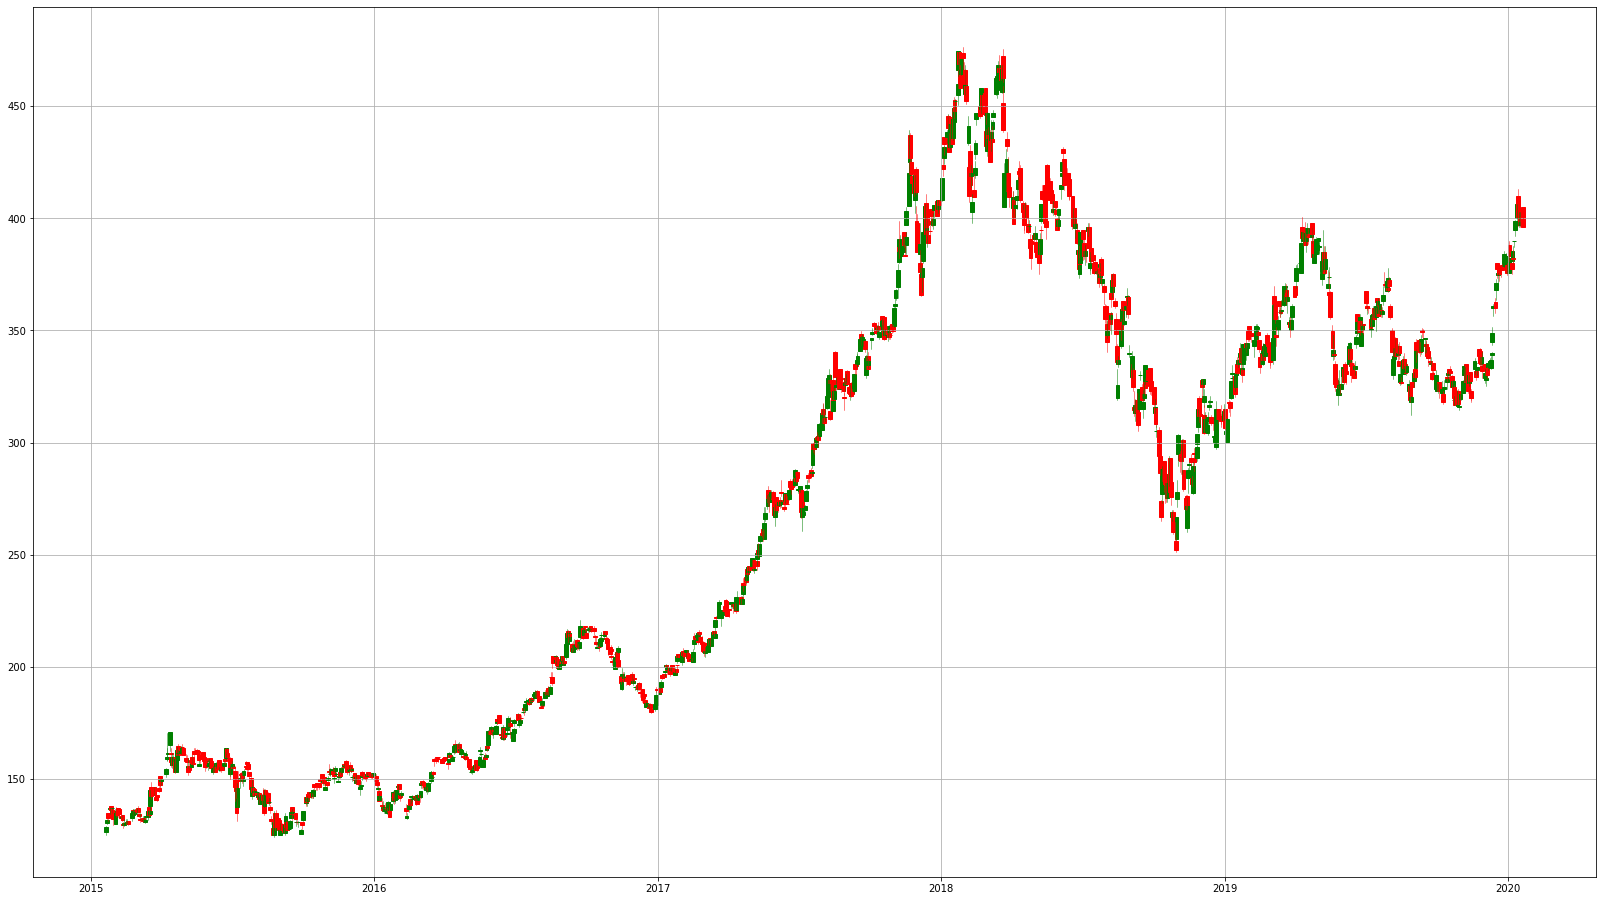

In [0]:

# Define a new subplot
ax = plt.subplot()

# Plot the candlestick chart and put date on x-Axis
candlestick_ohlc(ax, df_candle.values, width=5, colorup='g', colordown='r')
ax.xaxis_date()

# Turn on grid
ax.grid(True)

# Show plot
plt.show()

Obviously, there are **gaps** in the candle chart. 
In other words, the current day's price range[LOW, HIGH] has no overlap to that of the previous day.

### OPEN price instead of the previous prices is a better indicator for HIGH/LOW
1. In theory, market price is to response to market news, which most likely is released between trading days. And news could trigger the price jump up or down, which makes the previous price range cannot be a good leading indicator for the current price range. So that the OPNE price has priced in more news.
2. Even for the situation of dividends, the OPEN price as an indicator can deal with, which is better than previous prices.
3. The OPEN is always in the range of [LOW, HIGH].
4. It's pratical to predict HIGH/LOW after the market is open. Especially for a day trader.
5. Technically if we use OPEN as a benchmark, OPEN/HIGH and LOW/OPEN are both belongs to (0,1], which is good for deep learning to optimize.

### If we don't use OPEN as an indicator, in feature engineering, we should use other capping tricks to make sure the relative of HIGH and LOW are within (0,1].

## To Check the Tick Movement Frequency Distribution

We need to check the tick distribution to standardize the tick data

In [0]:
TICK_UNIT=0.2

In [0]:
df['HIGH_tick']=(np.round((df['HIGH']-df['OPEN'])/TICK_UNIT)).astype('int32')
df['LOW_tick']=(np.round((df['OPEN']-df['LOW'])/TICK_UNIT)).astype('int32')

df['RANGE_TICKS']=df['HIGH_tick']+df['LOW_tick'] ## ticks between day low and day high

In [0]:
df.max()

OPEN                 474.0
HIGH                 476.6
LOW                  466.8
CLOSE                474.6
ADJ CLOSE            472.3
VOLUME         308436765.0
HIGH_tick            102.0
LOW_tick              84.0
RANGE_TICKS          108.0
dtype: float64

In [0]:
df.mean()

OPEN           2.691491e+02
HIGH           2.717566e+02
LOW            2.661037e+02
CLOSE          2.688868e+02
ADJ CLOSE      2.676347e+02
VOLUME         2.027254e+07
HIGH_tick      1.303574e+01
LOW_tick       1.522177e+01
RANGE_TICKS    2.825751e+01
dtype: float64

In [0]:
df[["HIGH_tick","LOW_tick"]].groupby("HIGH_tick").count().head(40)

,LOW_tick
HIGH_tick,
0,183
1,48
2,64
3,55
4,63
5,77
6,28
7,42
8,48


In [0]:
df[["HIGH_tick","LOW_tick"]].groupby("LOW_tick").count().head(40)

,HIGH_tick
LOW_tick,
0,108
1,37
2,50
3,42
4,47
5,58
6,39
7,60
8,53


<BarContainer object of 72 artists>

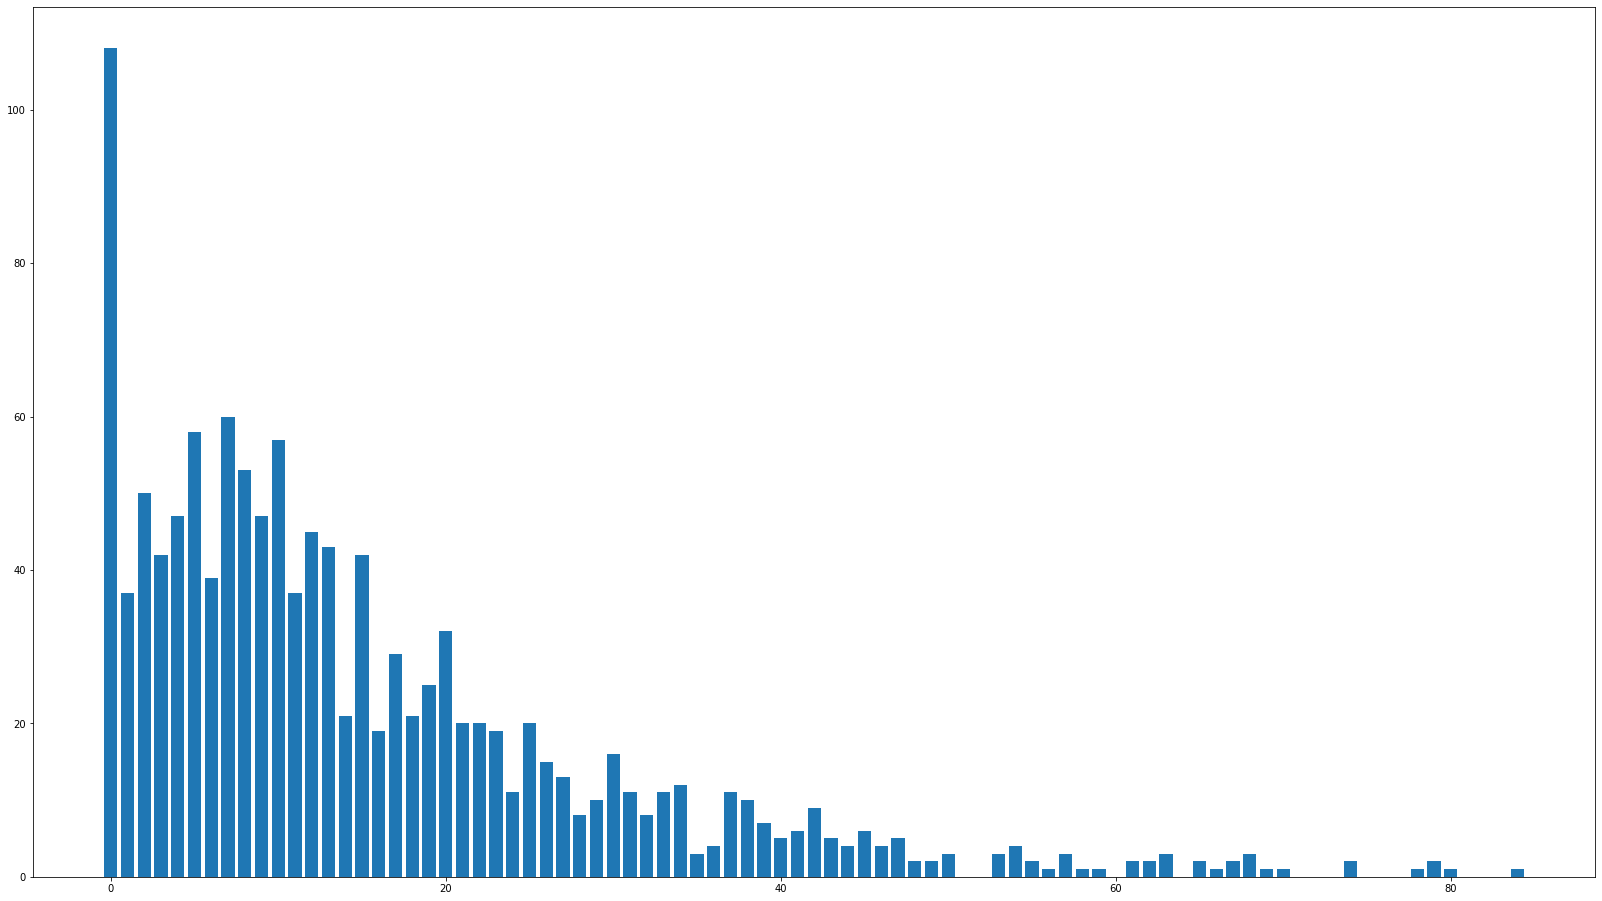

In [0]:
df_low_freq=pd.DataFrame({'count' : df[["HIGH_tick","LOW_tick"]].groupby("LOW_tick").size()}).reset_index()
plt.bar(df_low_freq["LOW_tick"], df_low_freq["count"])

<BarContainer object of 73 artists>

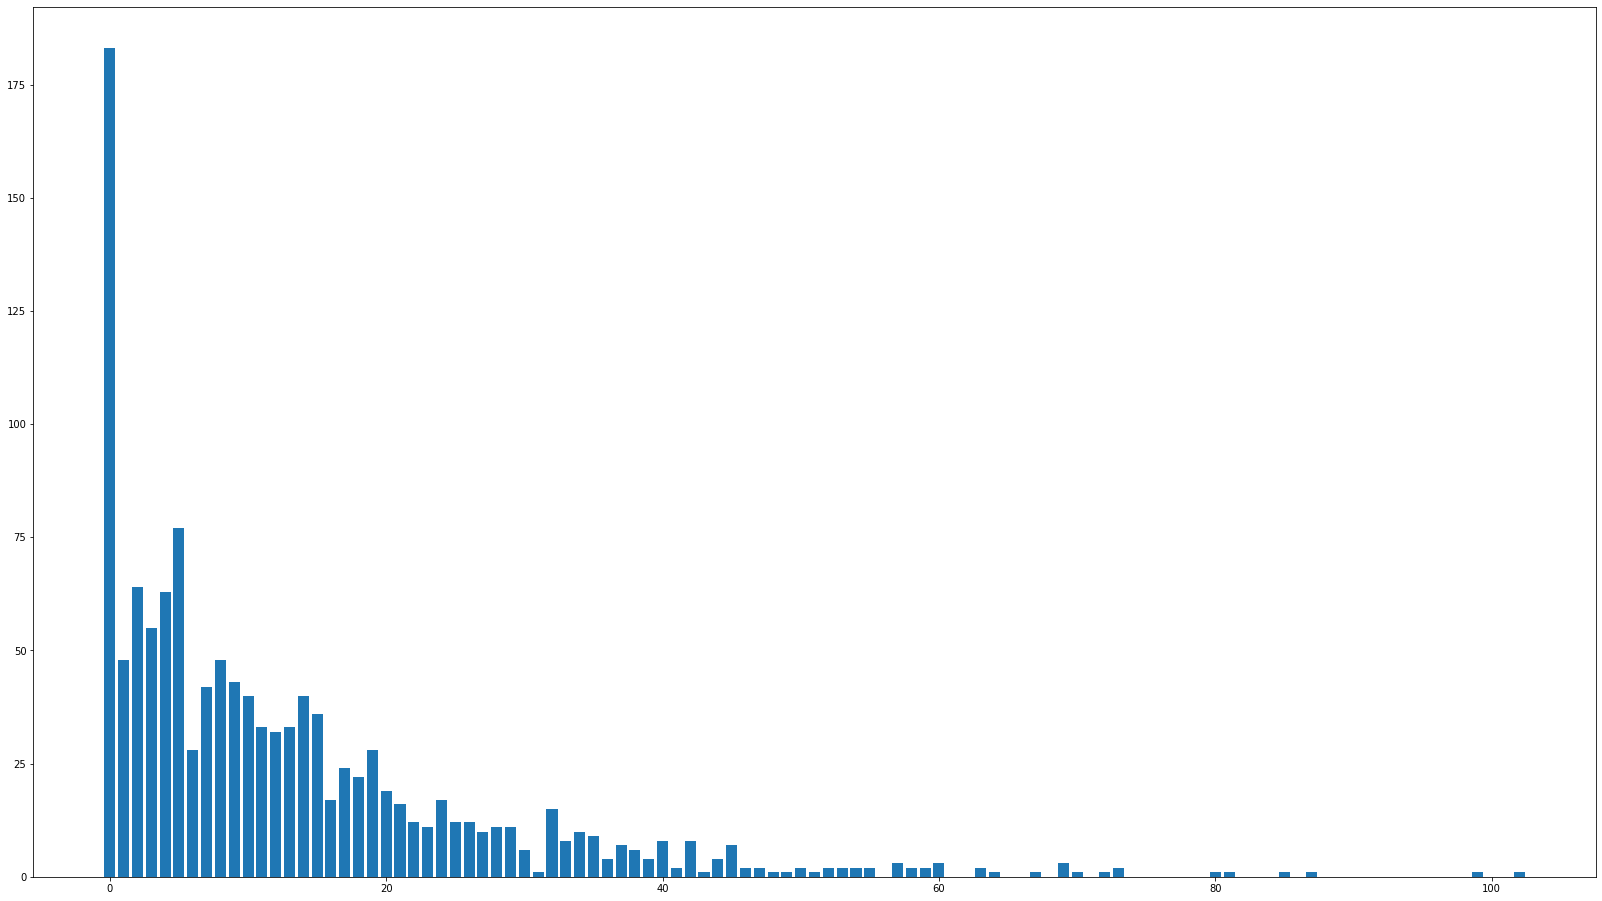

In [0]:
df_high_freq=pd.DataFrame({'count' : df[["HIGH_tick","LOW_tick"]].groupby("HIGH_tick").size()}).reset_index()
plt.bar(df_high_freq["HIGH_tick"], df_high_freq["count"])

<BarContainer object of 89 artists>

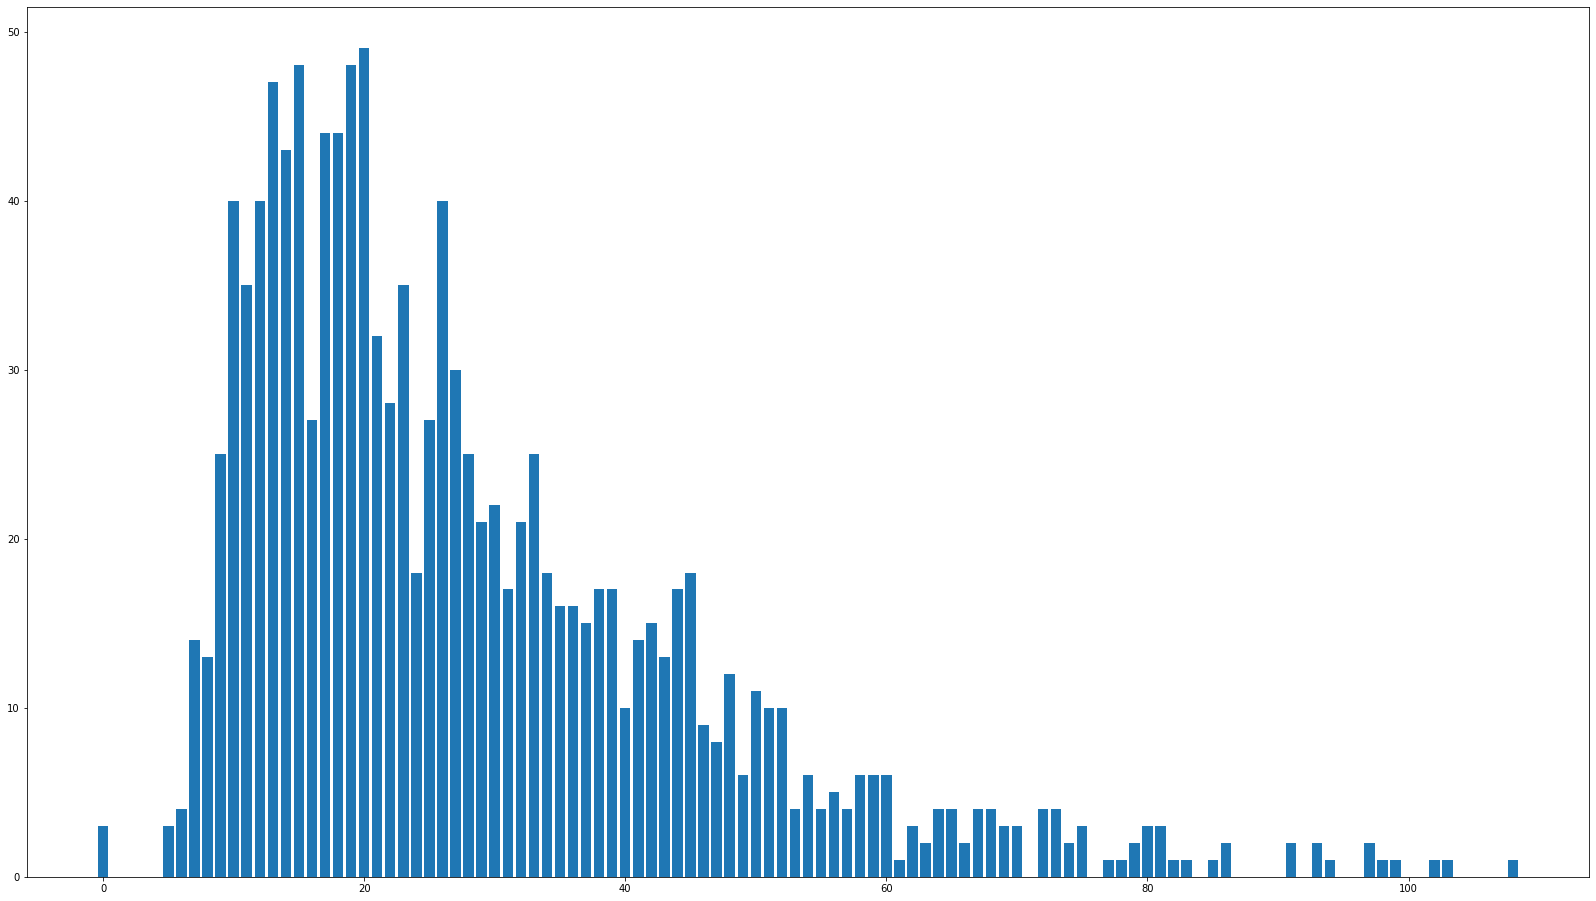

In [0]:
df_range_freq=pd.DataFrame({'count' : df[["RANGE_TICKS","LOW_tick"]].groupby("RANGE_TICKS").size()}).reset_index()
plt.bar(df_range_freq["RANGE_TICKS"], df_range_freq["count"])

In [0]:
MAX_RANGE_TICKS=100 # We use this to standardize the RANGE_TICKS

### Findings on Tick Movement Frequency Distribution

Based on OPEN data, the up/down tick movement can be 0-100.

For the situations of outliers, we may miss some better opportunity to make money, but the model can be more stable if we ignore the outliers.

## Overview Conclusion
There are no date conflicts, such as duplicate dates.
There are no N/A values.
But there are many price gaps. So even both of the next HIGH/LOW could be out of the range of the current day.

**OPEN price instead of the previous prices is a better indicator for HIGH/LOW.**


# Feature Engineering

In [0]:
df['CLOSE-1']=df['CLOSE'].shift(1)       # The LAST price of the previous day
df['OPEN/LAST-1']=df['OPEN']/df['CLOSE-1'] # The ratio of the current OPEN with the LAST price of the prevous day
df['OPEN+1']=df['OPEN/LAST-1'].shift(-1) # The next OPEN price
df['OPEN/HIGH']=df['OPEN']/df['HIGH'] # The ratio of OPEN with HIGH, which belongs to (0,1]
df['LOW/OPEN']=df['LOW']/df['OPEN'] # The ratio of LOW with OPEN, which belongs to (0,1]

In [0]:
df.dropna(inplace=True)
df.head()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,HIGH_tick,LOW_tick,RANGE_TICKS,CLOSE-1,OPEN/LAST-1,OPEN+1,OPEN/HIGH,LOW/OPEN
DATE,,,,,,,,,,,,,,
2015-01-22,130.5,132.0,129.7,131.6,130.0,39063807,8,4,12,128.7,1.013986,1.022796,0.988636,0.993870
2015-01-23,134.6,134.9,131.1,132.7,131.1,29965533,2,18,20,131.6,1.022796,1.030143,0.997776,0.973997
2015-01-26,136.7,137.1,134.3,137.0,135.3,34952624,2,12,14,132.7,1.030143,1.007299,0.997082,0.982443
2015-01-27,138.0,138.0,133.0,136.0,134.3,24455759,0,25,25,137.0,1.007299,1.006618,1.000000,0.963768
2015-01-28,136.9,137.0,134.7,136.9,135.2,16216906,0,11,11,136.0,1.006618,0.993426,0.999270,0.983930


## Outliers Processing by a customized scaler
To standardize the tick distribution

We will use our customized scale function to turn the tick data to the value of (0,1]. All outliers will be assign 1. 

In [0]:
def capped_with_1(tick_value):
        return min(1, tick_value)
        
df["HIGH_tick_std"] = df.apply(lambda x: capped_with_1(x["HIGH_tick"]/MAX_RANGE_TICKS),axis=1)
df["LOW_tick_std"] = df.apply(lambda x: capped_with_1(x["LOW_tick"]/MAX_RANGE_TICKS),axis=1)
df["RANGE_TICKS_std"]=df.apply(lambda x: capped_with_1(x["RANGE_TICKS"]/MAX_RANGE_TICKS),axis=1)
#df["LOW_tick_std"].max()

In [0]:
df.dropna(inplace=True) # Due to shift(1), the first row has N/A data
df.head()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,HIGH_tick,LOW_tick,RANGE_TICKS,CLOSE-1,OPEN/LAST-1,OPEN+1,OPEN/HIGH,LOW/OPEN,HIGH_tick_std,LOW_tick_std,RANGE_TICKS_std
DATE,,,,,,,,,,,,,,,,,
2015-01-22,130.5,132.0,129.7,131.6,130.0,39063807,8,4,12,128.7,1.013986,1.022796,0.988636,0.993870,0.08,0.04,0.12
2015-01-23,134.6,134.9,131.1,132.7,131.1,29965533,2,18,20,131.6,1.022796,1.030143,0.997776,0.973997,0.02,0.18,0.20
2015-01-26,136.7,137.1,134.3,137.0,135.3,34952624,2,12,14,132.7,1.030143,1.007299,0.997082,0.982443,0.02,0.12,0.14
2015-01-27,138.0,138.0,133.0,136.0,134.3,24455759,0,25,25,137.0,1.007299,1.006618,1.000000,0.963768,0.00,0.25,0.25
2015-01-28,136.9,137.0,134.7,136.9,135.2,16216906,0,11,11,136.0,1.006618,0.993426,0.999270,0.983930,0.00,0.11,0.11


# Model 1: Return based LSTM model

If we can predict relative HIGH, LOW based on OPEN price, we can get the correponding real HIGH and LOW.

**Range Prediction**

The most difficluty for this model is that the task is too predict one HIGH and one LOW value, which define a range. If there is no constraint on the prediction, the predicted LOW could be higher the predicted HIGH. So we have to predict a reasonable range.

The trick we do is that we use OPEN/HIGH and OPEN/LOW as the indicators and the data to be predicted. These 2 generated columns have the range of (0,1]. And all combines of OPEN/HIGH and OPEN/LOW means a reasonable range. The hinted HIGH is always higher or equal to the LOW.

**The critical activation function for the output layer**

For the predicted values lies on (0,1], and they have no direct relation between them. So that sigmoid aactivation function suites to the output layer.

![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

Of course, there are a few possible activation cadidates also. Such as: TanH, SQNL，Gaussian and SQ-RBF. But Sigmoid has good feature that the predicted values concentrate to 1, which fits our situation.

The detail on activation function can be found at:

[Activation function](https://en.wikipedia.org/wiki/Activation_function)



## Preprocess

In [0]:
history_values = df[["RANGE_TICKS_std","OPEN/HIGH",	"LOW/OPEN"]].values
history_values.shape

(1229, 3)

In [0]:
SEQ_LEN = 20 # about 1 month


def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append((data[index: index + seq_len]))
        #d.append(data[index: index + seq_len])

    na=np.array(d)
    #print(na.shape)
    #print(na[:2])
    return na

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1,: ]
    y_train = data[:num_train, -1, -2:]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:,-1, -2:]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(history_values, SEQ_LEN, train_split = 0.95)

In [0]:
X_train.shape

(1148, 19, 3)

## Model Define
This model is copied from a model to predict close price of a crypto currency.
This model is selectd for the author argued the model has some good technical features.

A common LSTM should be fine too.

The difference is that here are 2 outputs with sigmoid as activation function.

In [0]:
DROPOUT = 0.2 # In case overfitting
WINDOW_SIZE = (SEQ_LEN - 1)

model = keras.Sequential()

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=2))

model.add(Activation('sigmoid')) # So the value output is in the (0,1] 

## Training

In [0]:
model.compile(
    loss='mean_squared_error', 
    optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-09,# We choose a much smaller value for the predicted value is always near 1, so the loss can be always very small. In order to distinguish 1 tick difference, we need a very small epsilon.
    amsgrad=False,
    name='Adam')
)

In [0]:
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Train on 1033 samples, validate on 115 samples
Epoch 1/100
1033/1033 [==============================] - 3s 3ms/sample - loss: 0.0961 - val_loss: 0.0075
Epoch 2/100
1033/1033 [==============================] - 0s 207us/sample - loss: 0.0026 - val_loss: 4.7194e-04
Epoch 3/100
1033/1033 [==============================] - 0s 244us/sample - loss: 3.0440e-04 - val_loss: 1.7221e-04
Epoch 4/100
1033/1033 [==============================] - 0s 213us/sample - loss: 1.6948e-04 - val_loss: 1.1866e-04
Epoch 5/100
1033/1033 [==============================] - 0s 195us/sample - loss: 1.3693e-04 - val_loss: 9.9681e-05
Epoch 6/100
1033/1033 [==============================] - 0s 204us/sample - loss: 1.2298e-04 - val_loss: 8.9734e-05
Epoch 7/100
1033/1033 [==============================] - 0s 232us/sample - loss: 1.1647e-04 - val_loss: 8.3405e-05
Epoch 8/100
1033/1033 [==============================] - 0s 207us/sample - loss: 1.1164e-04 - val_loss: 7.9033e-05
Epoch 9/100
1033/1033 [========================

## Training Log

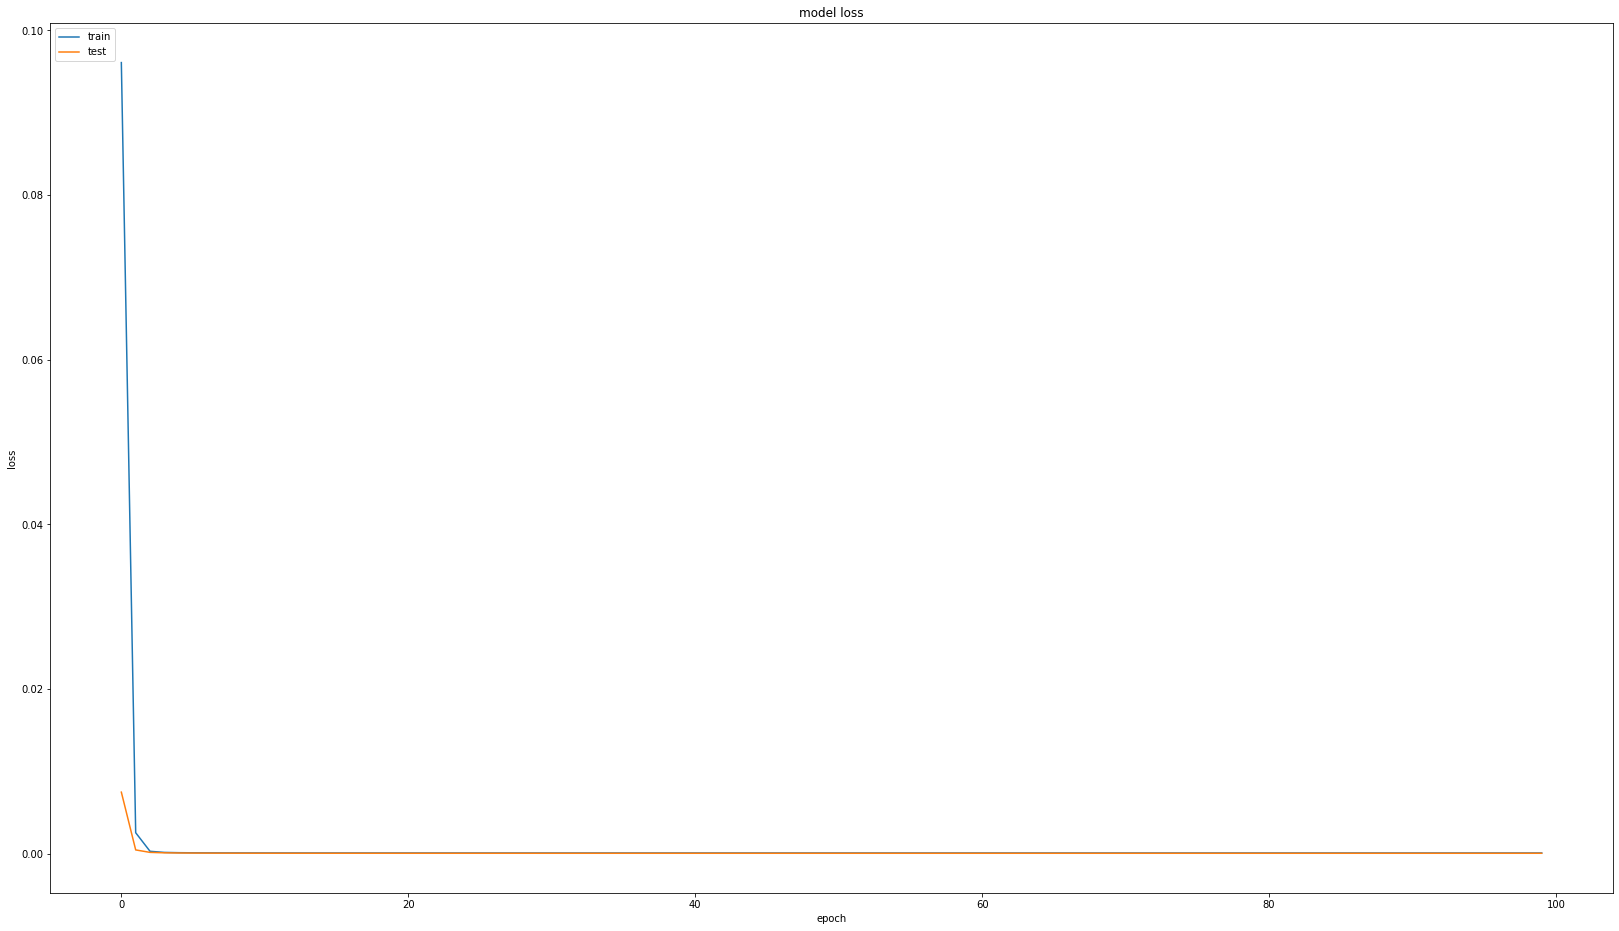

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

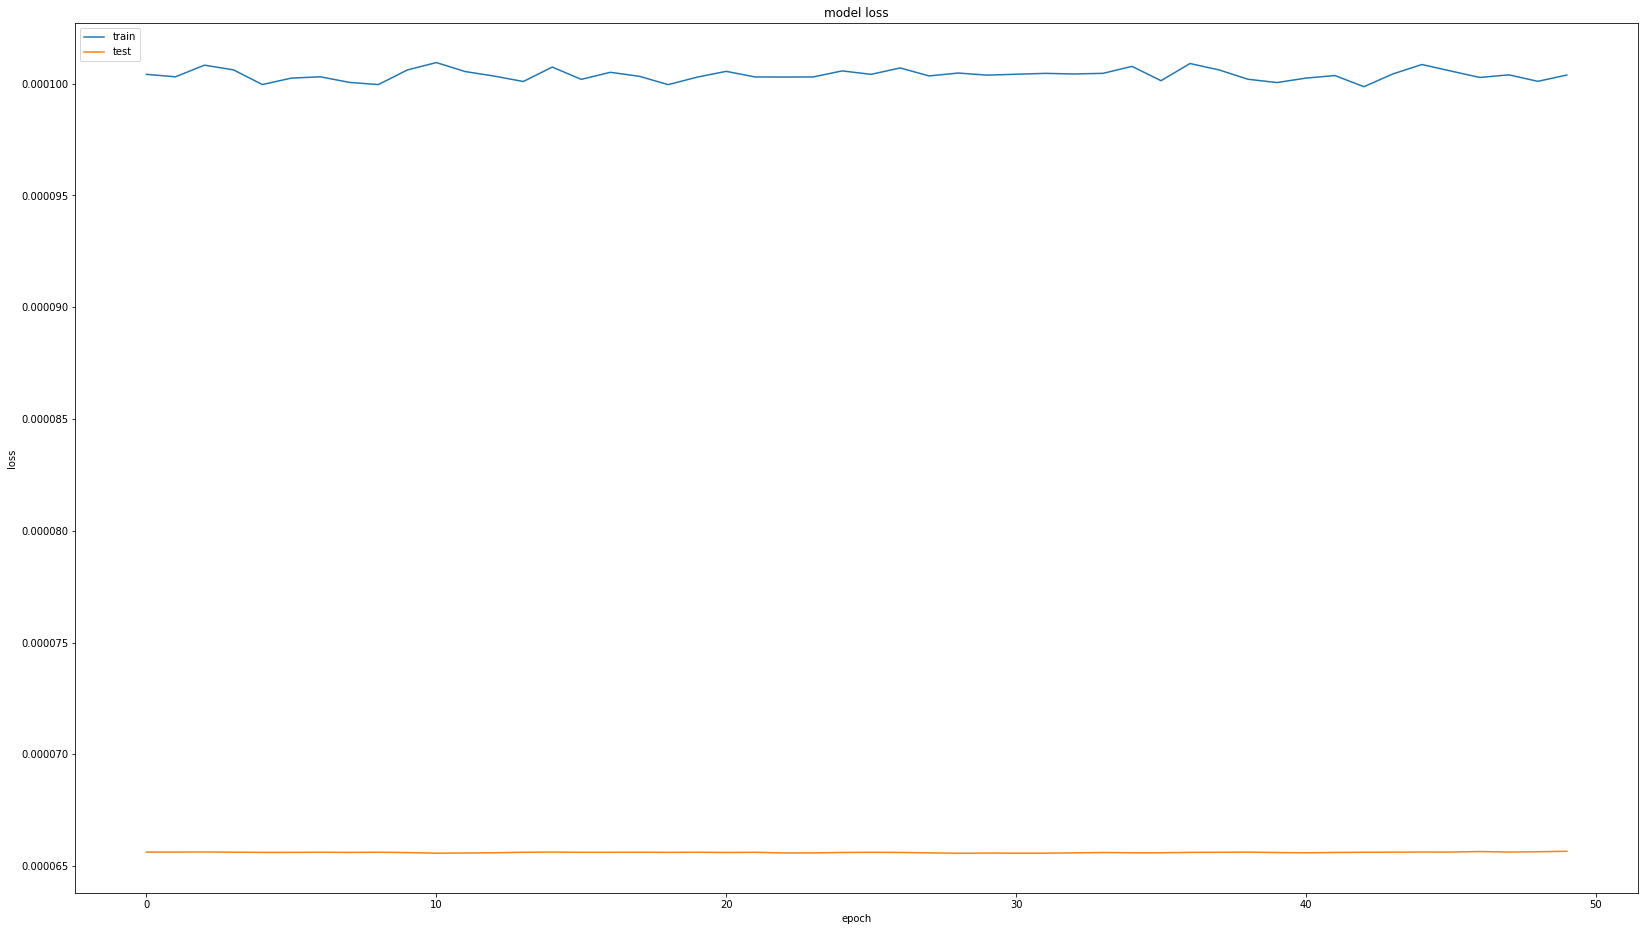

In [0]:
plt.plot(history.history['loss'][-50:])
plt.plot(history.history['val_loss'][-50:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 293us/sample - loss: 4.5586e-05


4.558617681633208e-05

## Model Predict

In [0]:
X_test.shape[0]

61

In [0]:
y_hat = model.predict(X_test)
df_test= df[-X_test.shape[0]:].reset_index()
df_test

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,HIGH_tick,LOW_tick,RANGE_TICKS,CLOSE-1,OPEN/LAST-1,OPEN+1,OPEN/HIGH,LOW/OPEN,HIGH_tick_std,LOW_tick_std,RANGE_TICKS_std
0,2019-10-21,329.6,330.2,324.8,324.8,324.8,13947162,3,24,27,331.0,0.995770,1.000616,0.998183,0.985437,0.03,0.24,0.27
1,2019-10-22,325.0,327.8,324.8,327.6,327.6,10448427,14,1,15,324.8,1.000616,0.991453,0.991458,0.999385,0.14,0.01,0.15
2,2019-10-23,324.8,325.8,319.6,320.0,320.0,19855257,5,26,31,327.6,0.991453,0.996875,0.996931,0.983990,0.05,0.26,0.31
3,2019-10-24,319.0,320.6,316.6,319.0,319.0,18472498,8,12,20,320.0,0.996875,1.004389,0.995009,0.992476,0.08,0.12,0.20
4,2019-10-25,320.4,320.4,316.6,316.6,316.6,15789881,0,19,19,319.0,1.004389,0.999368,1.000000,0.988140,0.00,0.19,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-01-13,400.0,406.4,397.4,406.4,406.4,27570261,32,13,45,398.6,1.003512,1.008858,0.984252,0.993500,0.32,0.13,0.45
57,2020-01-14,410.0,413.0,396.6,400.4,400.4,26827634,15,67,82,406.4,1.008858,0.992008,0.992736,0.967317,0.15,0.67,0.82
58,2020-01-15,397.2,403.0,396.2,398.8,398.8,15938138,29,5,34,400.4,0.992008,1.000502,0.985608,0.997482,0.29,0.05,0.34
59,2020-01-16,399.0,403.0,396.4,400.0,400.0,13770626,20,13,33,398.8,1.000502,1.000000,0.990074,0.993484,0.20,0.13,0.33


In [0]:

df_hat = pd.DataFrame(data =y_hat,columns=['OPEN/HIGH<hat>','LOW/OPEN<hat>'])
df_hat

,OPEN/HIGH<hat>,LOW/OPEN<hat>
0,0.990460,0.988908
1,0.990460,0.988910
2,0.990456,0.988902
3,0.990457,0.988905
4,0.990456,0.988903
...,...,...
56,0.990469,0.988909
57,0.990469,0.988913
58,0.990467,0.988908
59,0.990469,0.988905


In [0]:
df_compare=pd.concat([df_test, df_hat], axis=1)

df_compare

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,HIGH_tick,LOW_tick,RANGE_TICKS,CLOSE-1,OPEN/LAST-1,OPEN+1,OPEN/HIGH,LOW/OPEN,HIGH_tick_std,LOW_tick_std,RANGE_TICKS_std,OPEN/HIGH<hat>,LOW/OPEN<hat>
0,2019-10-21,329.6,330.2,324.8,324.8,324.8,13947162,3,24,27,331.0,0.995770,1.000616,0.998183,0.985437,0.03,0.24,0.27,0.990460,0.988908
1,2019-10-22,325.0,327.8,324.8,327.6,327.6,10448427,14,1,15,324.8,1.000616,0.991453,0.991458,0.999385,0.14,0.01,0.15,0.990460,0.988910
2,2019-10-23,324.8,325.8,319.6,320.0,320.0,19855257,5,26,31,327.6,0.991453,0.996875,0.996931,0.983990,0.05,0.26,0.31,0.990456,0.988902
3,2019-10-24,319.0,320.6,316.6,319.0,319.0,18472498,8,12,20,320.0,0.996875,1.004389,0.995009,0.992476,0.08,0.12,0.20,0.990457,0.988905
4,2019-10-25,320.4,320.4,316.6,316.6,316.6,15789881,0,19,19,319.0,1.004389,0.999368,1.000000,0.988140,0.00,0.19,0.19,0.990456,0.988903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-01-13,400.0,406.4,397.4,406.4,406.4,27570261,32,13,45,398.6,1.003512,1.008858,0.984252,0.993500,0.32,0.13,0.45,0.990469,0.988909
57,2020-01-14,410.0,413.0,396.6,400.4,400.4,26827634,15,67,82,406.4,1.008858,0.992008,0.992736,0.967317,0.15,0.67,0.82,0.990469,0.988913
58,2020-01-15,397.2,403.0,396.2,398.8,398.8,15938138,29,5,34,400.4,0.992008,1.000502,0.985608,0.997482,0.29,0.05,0.34,0.990467,0.988908
59,2020-01-16,399.0,403.0,396.4,400.0,400.0,13770626,20,13,33,398.8,1.000502,1.000000,0.990074,0.993484,0.20,0.13,0.33,0.990469,0.988905


## From Prediction to Ticks (Practical Price)

The prediction is actually OPEN based HIGH and LOW return. We need to convert it back to real price in the units of TICK.



In [0]:
df_compare['HIGH_hat']=np.floor((df_compare['OPEN']/df_compare['OPEN/HIGH<hat>'])/TICK_UNIT)*TICK_UNIT
df_compare['LOW_hat']=np.ceil((df_compare['OPEN']*df_compare['LOW/OPEN<hat>'])/TICK_UNIT)*TICK_UNIT
df_compare['HIGH_diff']=df_compare['HIGH_hat']-df_compare['HIGH']
df_compare['LOW_diff']=df_compare['LOW_hat']-df_compare['LOW']
df_compare['HIGH_diff_tick']=(np.round(df_compare['HIGH_diff']/TICK_UNIT)).astype('int32')
df_compare['LOW_diff_tick']=(np.round(df_compare['LOW_diff']/TICK_UNIT)).astype('int32')
df_compare['RANGE_TICKS_hat']=(np.round((df_compare['HIGH_hat']-df_compare['LOW_hat'])/TICK_UNIT)).astype('int32')

In [0]:
df_compare[['DATE', 'OPEN', 'CLOSE', 'HIGH', 'HIGH_hat','HIGH_diff_tick', 'LOW','LOW_hat','LOW_diff_tick','RANGE_TICKS','RANGE_TICKS_hat']]

,DATE,OPEN,CLOSE,HIGH,HIGH_hat,HIGH_diff_tick,LOW,LOW_hat,LOW_diff_tick,RANGE_TICKS,RANGE_TICKS_hat
0,2019-10-21,329.6,324.8,330.2,332.6,12,324.8,326.0,6,27,33
1,2019-10-22,325.0,327.6,327.8,328.0,1,324.8,321.4,-17,15,33
2,2019-10-23,324.8,320.0,325.8,327.8,10,319.6,321.2,8,31,33
3,2019-10-24,319.0,319.0,320.6,322.0,7,316.6,315.6,-5,20,32
4,2019-10-25,320.4,316.6,320.4,323.4,15,316.6,317.0,2,19,32
...,...,...,...,...,...,...,...,...,...,...,...
56,2020-01-13,400.0,406.4,406.4,403.8,-13,397.4,395.6,-9,45,41
57,2020-01-14,410.0,400.4,413.0,413.8,4,396.6,405.6,45,82,41
58,2020-01-15,397.2,398.8,403.0,401.0,-10,396.2,392.8,-17,34,41
59,2020-01-16,399.0,400.0,403.0,402.8,-1,396.4,394.6,-9,33,41


In [0]:
df_compare

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,HIGH_tick,LOW_tick,RANGE_TICKS,CLOSE-1,OPEN/LAST-1,OPEN+1,OPEN/HIGH,LOW/OPEN,HIGH_tick_std,LOW_tick_std,RANGE_TICKS_std,OPEN/HIGH<hat>,LOW/OPEN<hat>,HIGH_hat,LOW_hat,HIGH_diff,LOW_diff,HIGH_diff_tick,LOW_diff_tick,RANGE_TICKS_hat
0,2019-10-21,329.6,330.2,324.8,324.8,324.8,13947162,3,24,27,331.0,0.995770,1.000616,0.998183,0.985437,0.03,0.24,0.27,0.990460,0.988908,332.6,326.0,2.4,1.2,12,6,33
1,2019-10-22,325.0,327.8,324.8,327.6,327.6,10448427,14,1,15,324.8,1.000616,0.991453,0.991458,0.999385,0.14,0.01,0.15,0.990460,0.988910,328.0,321.4,0.2,-3.4,1,-17,33
2,2019-10-23,324.8,325.8,319.6,320.0,320.0,19855257,5,26,31,327.6,0.991453,0.996875,0.996931,0.983990,0.05,0.26,0.31,0.990456,0.988902,327.8,321.2,2.0,1.6,10,8,33
3,2019-10-24,319.0,320.6,316.6,319.0,319.0,18472498,8,12,20,320.0,0.996875,1.004389,0.995009,0.992476,0.08,0.12,0.20,0.990457,0.988905,322.0,315.6,1.4,-1.0,7,-5,32
4,2019-10-25,320.4,320.4,316.6,316.6,316.6,15789881,0,19,19,319.0,1.004389,0.999368,1.000000,0.988140,0.00,0.19,0.19,0.990456,0.988903,323.4,317.0,3.0,0.4,15,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-01-13,400.0,406.4,397.4,406.4,406.4,27570261,32,13,45,398.6,1.003512,1.008858,0.984252,0.993500,0.32,0.13,0.45,0.990469,0.988909,403.8,395.6,-2.6,-1.8,-13,-9,41
57,2020-01-14,410.0,413.0,396.6,400.4,400.4,26827634,15,67,82,406.4,1.008858,0.992008,0.992736,0.967317,0.15,0.67,0.82,0.990469,0.988913,413.8,405.6,0.8,9.0,4,45,41
58,2020-01-15,397.2,403.0,396.2,398.8,398.8,15938138,29,5,34,400.4,0.992008,1.000502,0.985608,0.997482,0.29,0.05,0.34,0.990467,0.988908,401.0,392.8,-2.0,-3.4,-10,-17,41
59,2020-01-16,399.0,403.0,396.4,400.0,400.0,13770626,20,13,33,398.8,1.000502,1.000000,0.990074,0.993484,0.20,0.13,0.33,0.990469,0.988905,402.8,394.6,-0.2,-1.8,-1,-9,41


## The Results Are Not Good Although the Training Seems Good

# How to improve







## Data

To improve the effectiveness of prediction, we need to add more data:
1. Instead of a single name, we need a big pool of names to train the model. The single name provides very limited data, which is very limited to train a model. Also, we will use the model to predict not only a single name but also for other names. And it’s better to have the data of the market index.

2. Instead of real HIGH and LOW values, we may need a more practical ones. The HIGH and LOW are extreme data, which is not stable and could be impacted by 1 price spike. Even we have predicted the extreme data correctly, which may be not feasible to fill an order. So instead of to predicate the HIGH and LOW, we may predicate the 95% confidence range based on the VWAP. Which could be more realistic.

3. Instead of a daily volume, we use an array of volume at price for the day. People believe that more volume means more evidence. So the extreme data (high/ low) can be predicted with more confidence.  

4. More reliable data, such as VWAP of AM, PM.

## Model

1. We may try other non-machine learning models, such as Fractionally cointegrated vector autoregressive model.

2. We may try other machine learning models, even auto-AI package.

3. We may tune hyperparameters.


# Conclusion

This repository was digested from a big project I did. In that project more feature engineering and extra model have been done and the results are good.

In this repsitory I didn't tune the hyperparameters yet. This is just for demo, but aim for a practical usage.